# Hacker Statistics: Simulation of probabilities
## Scenario:
The challenge is to atleast reach the 60th stair of the Empire State Building. The player will climb the stairs based upon the outcome of a dice roll.
## Rules:
- Can't go below stair 0
- 0.1% chance of falling down (have to start again from stair 0)
- Player will get only 100 rolls of dice (excluding the cases when the player gets '6' and rolls the dice again)
- If the outcome of dice roll is - 1/2 &rarr; step = -1
- If the outcome of dice roll is - 3/4/5 &rarr; step = +1
- If the outcome of dice roll is - 6 &rarr; step = roll the dice again and steps = number appearing on the dice(1/2/3/4/5/6)
- You have 100 turns.

## Bet:
- You will atleast reach the 60th stair.

## Problem Statement:
- What is the probability of atleast reaching the 60th stair? 

## Solution:
To calculate the probability of reaching the 60th stair or higher, we can take 2 approaches:
- An analytical calculation which will give us the exact probability.
- Simulate the random walk a large number of times, collect the results and from the distribution of the final steps of each random walk calculate the probability of reaching 60 stairs.
- We will take the 2nd approach

In [20]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

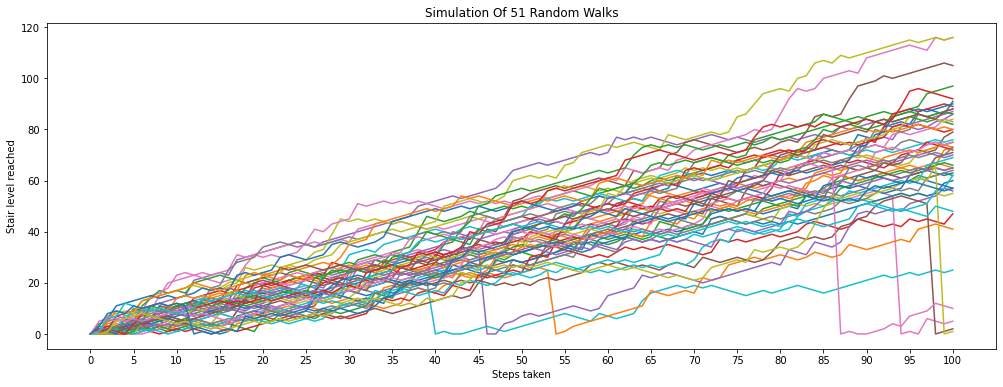

In [6]:
# Visualize all steps for all walks: walk progression

all_walks = []

total_walks =51
steps_in_a_walk = 100

for i in range(total_walks):
    stair_levels=[0]
    
    for i in range(steps_in_a_walk):
        
        # Clumsiness implementation
        if np.random.rand()< 0.001:
            stair_level = 0
        
        # When player is not clumsy
        else:
            last_step = stair_levels[-1]
            dice_roll = np.random.randint(1,7)
            if dice_roll <= 2:
                stair_level = max(0,last_step-1)
            elif dice_roll <= 5:
                stair_level = last_step+1
            else:
                stair_level = last_step + np.random.randint(1,7) 
        
        stair_levels.append(stair_level)
        
    #print(stair_levels)
    all_walks.append(stair_levels)
#print(all_walks)

# Visualize the walks
plt.figure(figsize=(17,6))
for each_walk in all_walks:
    plt.plot(each_walk)
plt.xlabel('Steps taken')
plt.xticks(range(0,101,5))
plt.ylabel('Stair level reached')
plt.title(f'Simulation Of {total_walks} Random Walks')
plt.show()

Probability of reaching exactly 60th stair: 0.5 %
Probability of exceeding 60th stair: 77.5 %
Probability of reaching atleast 60th stair: 78.0 %


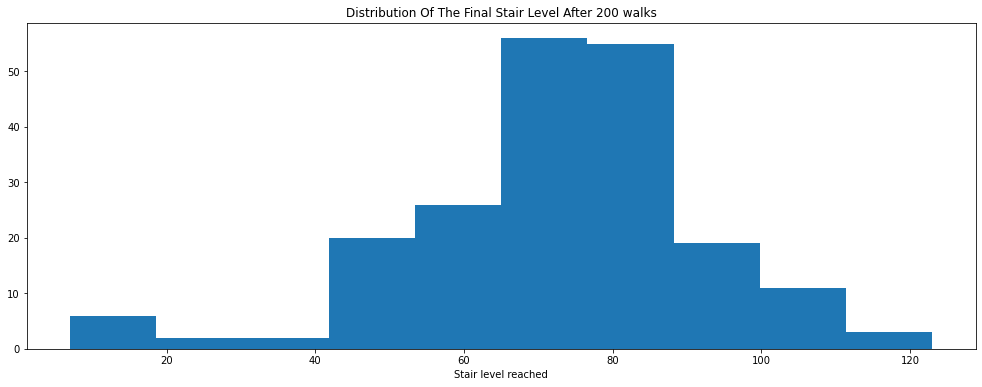

In [18]:
# Calculate the odds of reaching >= 60th stair

all_walks = []

total_walks = 200
steps_in_a_walk = 100

for i in range(total_walks):
    stair_levels=[0]
    
    for i in range(steps_in_a_walk):
        
        # Clumsiness implementation
        if np.random.rand()< 0.001:
            stair_level = 0
        
        # When player is not clumsy
        else:
            last_step = stair_levels[-1]
            dice_roll = np.random.randint(1,7)
            if dice_roll <= 2:
                stair_level = max(0,last_step-1)
            elif dice_roll <= 5:
                stair_level = last_step+1
            else:
                stair_level = last_step + np.random.randint(1,7) 
        
        stair_levels.append(stair_level)
    all_walks.append(stair_levels)

last_stair_levels =np.array(all_walks)[:,-1]
#probability_equal_to_60 
odds_1 = len(last_stair_levels[last_stair_levels==60])/len(last_stair_levels)
print('Probability of reaching exactly 60th stair:',round(odds_1*100.00,3),'%')

#probabilty_greater_than_60 
odds_2= len(last_stair_levels[last_stair_levels>60])/len(last_stair_levels)
print('Probability of exceeding 60th stair:',round(odds_2*100.00,3),'%')

#probability_of_greater_than_or_equal_to_60 
odds_3= len(last_stair_levels[last_stair_levels>=60])/len(last_stair_levels)
print('Probability of reaching atleast 60th stair:',round(odds_3*100.00,3),'%')

plt.figure(figsize=(17,6))

plt.hist(last_stair_levels)
plt.xlabel('Stair level reached')
plt.title(f'Distribution Of The Final Stair Level After {total_walks} walks')

plt.show()

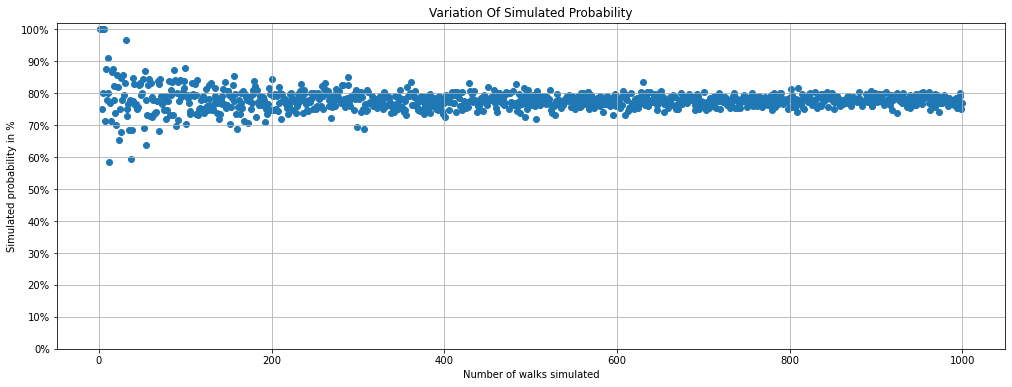

In [21]:
# Variation of simulated probability as the number of walks vary

list_of_walks = list(range(1,1001))
# list_of_walks
 
probability_of_atleast_60 =[]

for w in list_of_walks:

    all_walks = []
    total_walks = w
    steps_in_a_walk = 100

    for i in range(total_walks):
        stair_levels=[0]

        for i in range(steps_in_a_walk):

            # Clumsiness implementation
            if np.random.rand()< 0.001:
                stair_level = 0

            # When player is not clumsy
            else:
                last_step = stair_levels[-1]
                dice_roll = np.random.randint(1,7)
                if dice_roll <= 2:
                    stair_level = max(0,last_step-1)
                elif dice_roll <= 5:
                    stair_level = last_step+1
                else:
                    stair_level = last_step + np.random.randint(1,7) 

            stair_levels.append(stair_level)
        all_walks.append(stair_levels)

    last_stair_levels =np.array(all_walks)[:,-1]
    
    #probability_of_greater_than_or_equal_to_60 
    odds= 100.00*len(last_stair_levels[last_stair_levels>=60])/len(last_stair_levels)
    probability_of_atleast_60.append(odds)

# variation of simulated probabilities:

plt.figure(figsize=(17,6))

plt.scatter(list_of_walks,probability_of_atleast_60)
plt.xlabel('Number of walks simulated')
plt.ylabel('Simulated probability in %')
plt.yticks(range(0,101,10),['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('Variation Of Simulated Probability')
plt.grid()
plt.show() 

## Conclusion
We can see that as our sample size increases (we simulate larger and larger number of walks), our simulated probability starts converging to 75-80%. This is the correct behavior as we should reach the actual probability value when our sample size keeps increasing towards infinity.